In [1]:
import re
import json
import pandas as pd
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [19]:
# Load the data from the uploaded CSV file
file_path = '../past_data/combined_mid_prices.csv'
data = pd.read_csv(file_path)

# Retry adding the new column 'Gift_Basket_Premium'
data['Gift_Basket_Premium'] = data['Gift_Basket_Mid_Price'] - (
    6 * data['Strawberries_Mid_Price'] + 
    4 * data['Chocolate_Mid_Price'] + 
    data['Roses_Mid_Price']
)

print(data['Gift_Basket_Premium'].median())
print(data['Gift_Basket_Premium'].mean())

381.0
379.4904833333333


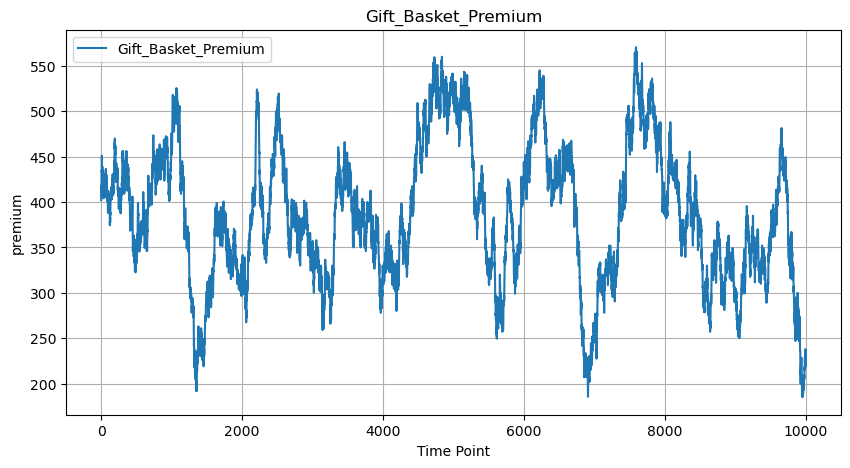

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(data['Gift_Basket_Premium'], label='Gift_Basket_Premium')
plt.title('Gift_Basket_Premium')
plt.xlabel('Time Point')
plt.ylabel('premium')
plt.legend()
plt.grid(True)
plt.show()